In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import enchant
import re

In [116]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [149]:
# Import Data
df = pd.read_csv('data/articles.csv', index_col='index')

In [150]:
df.date = pd.to_datetime(df.date)

In [151]:
df.tail()

,title,url,date,tags,words,content
index,,,,,,
5698,Seeking an Aurora: A Wondrous Illustrated Cele...,https://www.brainpickings.org/2021/03/28/seeki...,2021-03-28,"science, culture, childrens-books, art, space,...",692,"In 1621, already questioning his life in the p..."
5699,Gertrude Stein on Writing and Belonging - “Eve...,https://www.brainpickings.org/2021/03/30/gertr...,2021-03-30,"culture, gertrude-stein, writing, books, philo...",458,“You only are free when you realize you belong...
5700,"Naomi Shihab Nye’s Beloved Ode to Kindness, An...",https://www.brainpickings.org/2021/04/01/naomi...,2021-04-01,"culture, film, naomi-shihab-nye, animation, ar...",636,"“Nothing can make our life, or the lives of ot..."
5701,Maria Mitchell’s Telescope and the Kickstartin...,https://www.brainpickings.org/2021/04/03/maria...,2021-04-03,"astronomy, maria-mitchell, science, culture, r...",1676,To be human is to live suspended between the s...
5702,Growing Through Grief: Derek Jarman on Gardeni...,https://www.brainpickings.org/2021/04/04/derek...,2021-04-04,"derek-jarman, culture, film, journals, books, ...",1373,"“In forty years of medical practice,” the grea..."


In [120]:
word_count = sum(df["words"])
art_count = len(df["title"])
#print(df.date[-1:] - df.date[1])
print("Maria Popova has published " + str(word_count) + " words & " + str(art_count) + " articles!")
print("The average article length is " + str(int(word_count/art_count)) + " words.")
print("The articles span " + str(round(4959/365.25, 1)) + " years.")
print("Over that time, she has published an article every " + str(round(4959*24/art_count)) + " hours!")

Maria Popova has published 5088341 words & 5702 articles!
The average article length is 892 words.
The articles span 13.6 years.
Over that time, she has published an article every 21 hours!


King James Bible: 783,137 words

In Search of Lost Time (7 vols.): 1.27 million words

Game of Thrones (5 vols.): 1.74 million

Outlander series (8 vols.): 3.17 million words (7,533 pages)

In [9]:
#Outlander
283910 + 338430 + 380770 + 390050 + 482850 + 502860 + 400055 + 391500

3170425

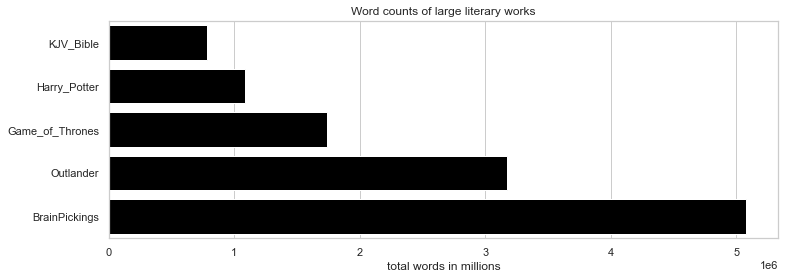

In [19]:
palette = "autumn"
f, ax = plt.subplots(figsize=(12, 4))
sns.set_theme(style="whitegrid")
words = dict(KJV_Bible=783000, Harry_Potter=1084170,
             Game_of_Thrones=1740000, Outlander=3170000, BrainPickings=5080000)
ax =sns.barplot(y=list(words.keys()), x=list(words.values()), color="black")
ax.set(xlabel='total words in millions', title="Word counts of large literary works")
plt.savefig("totalwords.png")

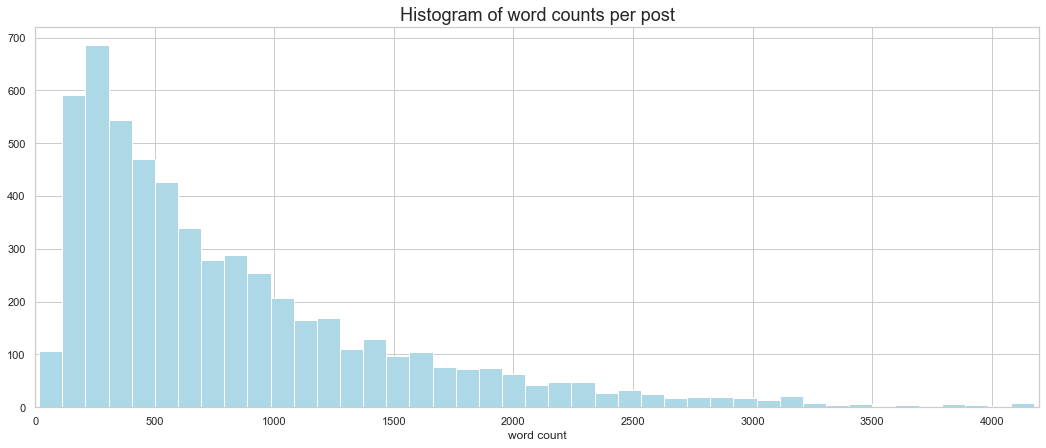

In [140]:
sns.set_theme(style="whitegrid") #use!
f, ax = plt.subplots(figsize=(18, 7))
sns.set(font_scale=1.5)
df.words.hist(bins=170, color="lightblue")
ax.set(xlabel='word count')
ax.set_title("Histogram of word counts per post")
ax.set_xlim(0,4200)
plt.savefig("wordcount.png");

In [122]:
year_article_counts = df.date.groupby(df.date.dt.year).agg("count")

In [51]:
sum(year_article_counts[8:])

1927

In [55]:
sum(year_word_counts[:7])

1938398

In [57]:
sum(year_word_counts[8:])

2290451

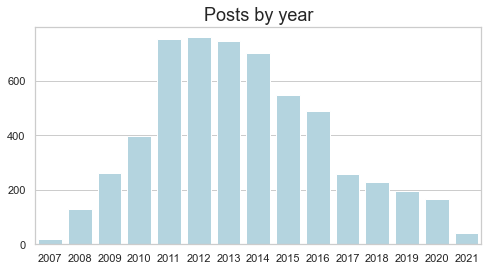

In [134]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 4))
sns.set(font_scale=1.5)
sns.barplot(x=year_article_counts.index,y=year_article_counts.values, color="lightblue")
ax.set(xlabel='', title="Posts by year")
plt.savefig("posts.png");

Complete this visual with stacked bars indicating tags.

In [124]:
year_word_counts = df.words.groupby(df.date.dt.year).agg("sum")
year_word_counts

date
2007     30893
2008     67598
2009     95319
2010    140938
2011    336249
2012    505655
2013    761746
2014    855349
2015    664427
2016    587429
2017    306642
2018    262590
2019    252131
2020    173273
2021     48102
Name: words, dtype: int64

In [46]:
#through 2014
sum(year_word_counts[:8])

2793747

In [49]:
#after 2014
sum(year_word_counts[8:])

2290451

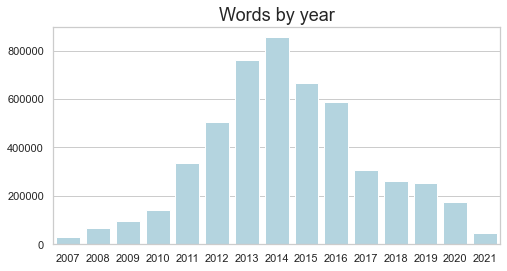

In [135]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 4))
sns.set(font_scale=1.5)
sns.barplot(x=year_word_counts.index,y=year_word_counts.values, color="lightblue")
ax.set(xlabel='', title="Words by year")
plt.savefig("words.png");

In [126]:
science = []
for ix, tag in enumerate(df.tags):
    if re.match(".*science,.*", tag): science.append(ix)
sci_ser = df.iloc[science].date.groupby(df.date.dt.year).agg("count")

poetry = []
for ix, tag in enumerate(df.tags):
    if re.match(".*poetry,.*", tag): poetry.append(ix)
poe_ser = df.iloc[poetry].date.groupby(df.date.dt.year).agg("count")

love = []
for ix, tag in enumerate(df.tags):
    if re.match(".*love,.*", tag): love.append(ix)
lov_ser = df.iloc[love].date.groupby(df.date.dt.year).agg("count")

In [127]:
a = sci_ser
b = a.add(poe_ser, fill_value=0)
c = b.add(lov_ser, fill_value=0)

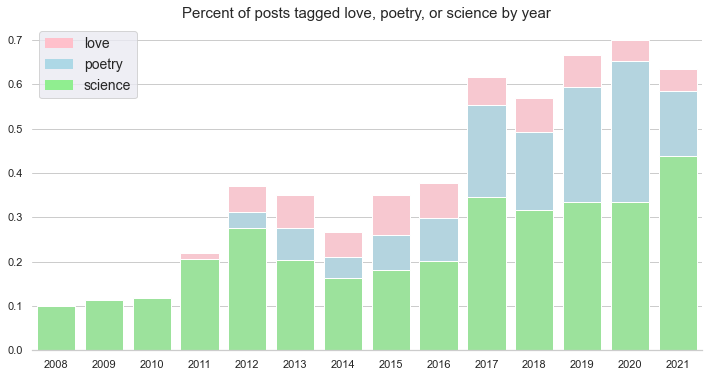

In [132]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 6))
sns.set(font_scale=1.25)
sns.barplot(x=c.index, y=c/year_article_counts[1:].values, color="pink")
sns.barplot(x=b.index, y=b/year_article_counts[1:].values, color="lightblue")
sns.barplot(x=a.index, y=a/year_article_counts[1:].values, color="lightgreen")
ax.set(xlabel='', ylabel='', title="Percent of posts tagged love, poetry, or science by year")

sns.despine(left=True)
top = plt.Rectangle((0,0),1,1,fc="pink", edgecolor = 'none')
mid = plt.Rectangle((0,0),1,1,fc='lightblue',  edgecolor = 'none')
bot = plt.Rectangle((0,0),1,1,fc='lightgreen',  edgecolor = 'none')
plt.legend([top, mid, bot], ['love', 'poetry', 'science'], loc=2, ncol = 1, prop={'size':14})
plt.savefig("lovepoetsci.png")

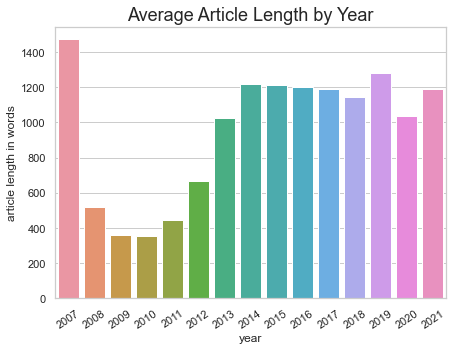

In [21]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(7, 5))
sns.set(font_scale=1.5)
year_article_length = round(year_word_counts/year_article_counts)
ax = sns.barplot(x=year_article_length.index,
                 y=year_article_length.values)
ax.set(xlabel='year', ylabel='article length in words', title="Average Article Length by Year")
plt.xticks(rotation=34);

In [152]:
df["early"]=1
df.early[(df.date>'2014-06-20')]=0

#I drop the split year where half of all errors were originally
#df = df[(df.date.dt.year != 2014)]

<ipython-input-152-bfbf843d4132>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.early[(df.date>'2014-06-20')]=0


In [153]:
df_early = df[(df.early == 1)]
df_late = df[(df.early == 0)]

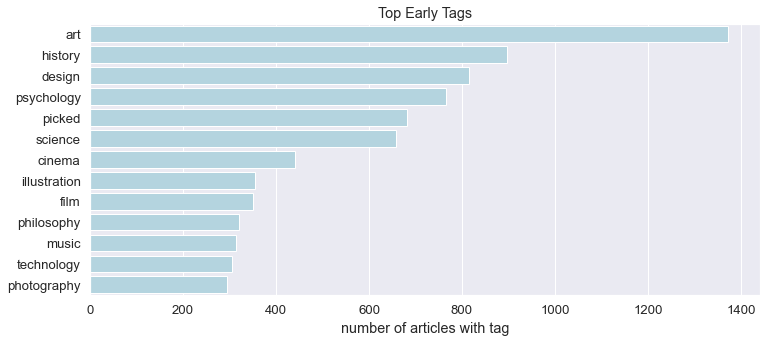

In [164]:
#create a tag dictionary
tags = str()
for tag in df_early.tags: tags += tag
tag_dict = dict()
for tag in tags.split():
    tag = tag.replace(",","")
    if tag in tag_dict:
        tag_dict[tag] += 1
    else:
        tag_dict[tag] = 1    
from heapq import nlargest
#top
N=15
res = nlargest(N, tag_dict, key=tag_dict.get)
top_tags = dict()
for r in res: top_tags[r] = tag_dict[r]
del top_tags['culture']
del top_tags['books']

f, ax = plt.subplots(figsize=(12, 5))
sns.set(font_scale=1.2)
ax =sns.barplot(y=list(top_tags.keys()),
                x=list(top_tags.values()), color="lightblue")
ax.set(xlabel='number of articles with tag', title="Top Early Tags")
plt.savefig("early_tags.png")

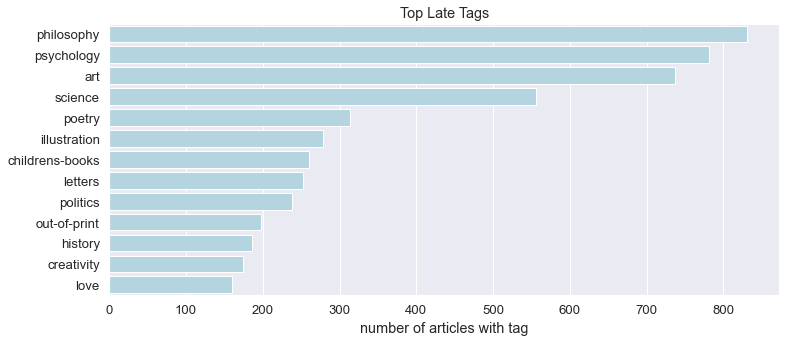

In [165]:
#create a tag dictionary
tags = str()
for tag in df_late.tags: tags += tag
tag_dict = dict()
for tag in tags.split():
    tag = tag.replace(",","")
    if tag in tag_dict:
        tag_dict[tag] += 1
    else:
        tag_dict[tag] = 1    
from heapq import nlargest
#top
N=15
res = nlargest(N, tag_dict, key=tag_dict.get)
top_tags = dict()
for r in res: top_tags[r] = tag_dict[r]
del top_tags['culture']
del top_tags['books']

f, ax = plt.subplots(figsize=(12, 5))
sns.set(font_scale=1.2)
ax =sns.barplot(y=list(top_tags.keys()),
                x=list(top_tags.values()), color="lightblue")
ax.set(xlabel='number of articles with tag', title="Top Late Tags")
plt.savefig("late_tags.png")

In [172]:
text = df.content

In [183]:
vocabulary=[]
for ix, t in enumerate(text):
    t=t.lower()
    t=re.sub(r'[^\w\s]',' ',t)
    t=re.sub(r'[^[1-9]\d*$]','',t)
    text[ix]=t
    vocabulary += t.split()
vocabulary = sorted(list(set(vocabulary)))
len(vocabulary)

71008

In [192]:
vocabulary[1500:1600]

['990s',
 '996',
 '997',
 '999',
 '9999',
 '99999',
 '999999',
 '9999999999999',
 '9999999999999999999',
 '99th',
 '99u',
 '99½',
 '9am',
 '9b',
 '9b75',
 '9c68f6b830e5',
 '9db7',
 '9e7a',
 '9h',
 '9li',
 '9t8h7te1',
 '9th',
 '_',
 '_____',
 '_______',
 'a',
 'a3',
 'a4',
 'a4e6',
 'a874',
 'aa',
 'aaaarrrgghh',
 'aaarrrgghh',
 'aaas',
 'aack',
 'aaker',
 'aambitious',
 'aao',
 'aardvark',
 'aarne',
 'aaron',
 'aarp',
 'aavso',
 'ab',
 'aback',
 'abacus',
 'abandon',
 'abandoned',
 'abandoner',
 'abandoning',
 'abandonment',
 'abandons',
 'abasement',
 'abashed',
 'abassides',
 'abate',
 'abated',
 'abatement',
 'abating',
 'abattoir',
 'abbaci',
 'abbas',
 'abbe',
 'abbey',
 'abbie',
 'abbot',
 'abbott',
 'abbreviate',
 'abbreviated',
 'abbreviating',
 'abbreviation',
 'abbreviations',
 'abby',
 'abbye',
 'abbé',
 'abc',
 'abc3d',
 'abcinema',
 'abcs',
 'abdalqahir',
 'abdel',
 'abdicate',
 'abdicated',
 'abdicating',
 'abdication',
 'abdomen',
 'abdominal',
 'abdominals',
 'abducted'

In [176]:
#Enchant is an English dictionary
vocab_enchant = list()
d = enchant.Dict("en_US")
#if a word in the corpus is in the enchant dictionary, it is included
for word in vocabulary:
    if d.check(word):
        vocab_enchant.append(word)
len(vocab_enchant)

42473

In [190]:
sorted(vocab_enchant)

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '_',
 'a',
 'aardvark',
 'ab',
 'aback',
 'abacus',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abandons',
 'abasement',
 'abashed',
 'abate',
 'abated',
 'abatement',
 'abating',
 'abattoir',
 'abbe',
 'abbey',
 'abbot',
 'abbreviate',
 'abbreviated',
 'abbreviating',
 'abbreviation',
 'abbreviations',
 'abdicate',
 'abdicated',
 'abdicating',
 'abdication',
 'abdomen',
 'abdominal',
 'abducted',
 'abductee',
 'abductees',
 'abduction',
 'abed',
 'aberrant',
 'aberration',
 'aberrations',
 'abet',
 'abetted',
 'abeyance',
 'abhor',
 'abhorred',
 'abhorrence',
 'abhorrent',
 'abhors',
 'abide',
 'abides',
 'abiding',
 'abidingly',
 'abilities',
 'ability',
 'abject',
 'abjection',
 'abjectly',
 'ablation',
 'ablaze',
 'able',
 'abloom',
 'ablution',
 'ablutions',
 'abnegation',
 'abnormal',
 'abnormalities',
 'abnormality',
 'abnormally',
 'aboard',
 'abode',
 'abodes',
 'abolish',
 'abolished',
 'abolishing',


In [177]:
vocab_lemmatized = list()
lemmatizer = WordNetLemmatizer()
#Lemmatization is the process of grouping together the different inflected forms of a word
for word in vocab_enchant:
    vocab_lemmatized.append(lemmatizer.lemmatize(word))
    
vocab_lemmatized = sorted(list(set(vocab_lemmatized)))
vocab_str = str()
for word in vocab_lemmatized:
    vocab_str += word + ", "
#this is a good estimate of Maria Popova's working vocabulary
#her true vocabulary is probably double this
len(vocab_lemmatized)

NameError: name 'WordNetLemmatizer' is not defined

In [ ]:
#wordy mcwordiness 35,000
vocab_str